In [1]:
#Import all necessary Libraries
import numpy as np
import pandas as pd 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from subprocess import check_output
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
# RandomForestClassifier and GridSearch
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split,GridSearchCV ,StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC 
import warnings
warnings.filterwarnings("ignore")

###### Load the data using read_csv function from pandas package

In [2]:
data = pd.read_csv("./NLP_Projects/train.csv")
pd.set_option('display.max_colwidth', -1)
data.head(2)

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The Defender of the Wiki Barnstar I like your edit on the Kayastha page. Lets form a solidarity group against those who malign the article and its subject matter. I propose the folloing name for the group.\r\n\r\nUnited intellectuals' front of Kayastha ethinicty against racist or castist abuse (UIFKEARCA) """,0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I have said about Mathsci, he has said far more extreme and unpleasant things about me (not to mention others), and with much greater frequency. I'm more than happy to reign myself in, if that's what you'd like (ruth be told, I was just trying to get Mathsci to pay attention and stop being uncivil). I would expect you to issue the same request to Mathsci. \r\n\r\n If this is intentionally unbalanced (for whatever reason), please let me know, and I will voluntarily close this account and move on to other things. I like wikipedia, and I have a lot to contribute in my own way, but there is no point contributing to the project if some editors have administrative leave to be aggressively rude. I'm a good editor, and I don't really deserve to have people riding my ass every time I try to do certain things. I'll happily leave it in the hands of the drama-prone, if that's what you think is best. Ludwigs2 """,0


###### Keeping Comments and Toxic as the only two columns for analysis

In [3]:
data = data[['comment_text','toxic']]

###### Checking for Nulls and shape of data

In [4]:
print(data.isnull().sum())
print()
print('shape of data : ' ,data.shape)

comment_text    0
toxic           0
dtype: int64

shape of data :  (5000, 2)


###### Check the number of Toxic and Non -Toxic values

0    4563
1    437 
Name: toxic, dtype: int64


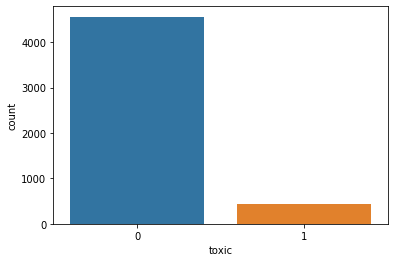

In [6]:
print(data['toxic'].value_counts())
sns.countplot(x ='toxic', data = data) 

###### The Toxic: Non-toxic comments as in the input file is approximately 1:10

###### Cleanup: 

In [17]:
data['comment_text'].head(2)

0    barnstar defender wiki barnstar like edit kayastha page lets form solidarity group malign article subject matter propose folloing name group united intellectuals front kayastha ethinicty racist castist abuse uifkearca                                                                                                                                                                                                                                                                                                                                           
1    seems unbalanced whatever said mathsci said far extreme unpleasant things mention others much greater frequency happy reign like ruth told trying get mathsci pay attention stop uncivil would expect issue request mathsci intentionally unbalanced whatever reason please let know voluntarily close account move things like wikipedia lot contribute way point contributing project editors administrative leave aggressively rude good editor really

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
def clean_text(text):
    lowered_text = text.lower()
    word_text = re.sub('\W', ' ', lowered_text)
    cleaned_text = re.sub('\s+', ' ', word_text)
    cleaned_text = re.sub('\d', '', word_text)
    word_text = cleaned_text.strip(' ')
    text_nopunct = "".join([word for word in word_text if word not in string.punctuation]) 
    text_no_stop_words = " ".join([word for word in text_nopunct.split() if word not in stop_words ])
    return text_no_stop_words

In [20]:
train_data = []
tokenized_words = []
for i in range(0,len(data)):
    text1 = clean_text(data['comment_text'][i])
    train_data.append(text1)
data['comment_text'] = pd.Series(train_data).astype(str)
for i in train_data:
    tokenized_words += word_tokenize(i)


In [21]:
len(tokenized_words)

172665

In [22]:
df = pd.Series(tokenized_words).value_counts().sort_values()
df = pd.DataFrame(df,columns = ['count'])

In [23]:
df1 = df[((df['count'] > 1000) == True)]

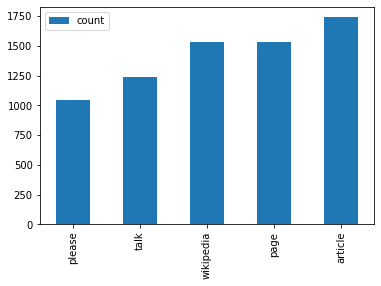

In [24]:
df1.plot.bar()
plt.show()

In [25]:
contextual_stop_words = df1.index.values.tolist()

In [26]:
contextual_stop_words

['please', 'talk', 'wikipedia', 'page', 'article']

In [27]:
stop_words.update(contextual_stop_words)

In [28]:
lemmatizer = WordNetLemmatizer()
def stem_text(text):
    tokens = re.split('\W+', text)
    text = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return text

In [29]:
tfidf_vect = TfidfVectorizer(analyzer=stem_text, min_df = 0.05)
X_tfIdf = tfidf_vect.fit_transform(data['comment_text'])

In [30]:
X_features = pd.DataFrame(X_tfIdf.toarray())

In [36]:
print(X_features.shape)
X_features.head(2)

(5000, 44)


,also,article,comment,could,edit,editing,editor,edits,even,fact,...,thing,think,time,use,user,want,way,well,work,would
0,0.0,0.0,0.0,0.0,0.757072,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.417998,0.0,0.0,0.0,...,0.605191,0.17308,0.180363,0.0,0.0,0.0,0.199513,0.0,0.0,0.158512


In [37]:
feature_names = tfidf_vect.get_feature_names()
X_features.columns=feature_names

In [38]:
X_train,X_test, y_train, y_test = train_test_split(X_features, data['toxic'], train_size = 0.7, shuffle=True,random_state = 123 )
print(len(X_train), len(X_test), len(y_train), len(y_test))

3500 1500 3500 1500


In [39]:
#SVC
model = SVC() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[1371    0]
 [ 129    0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1371
           1       0.00      0.00      0.00       129

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



In [40]:
y_pred_train =  model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

[[3192    0]
 [ 308    0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3192
           1       0.00      0.00      0.00       308

    accuracy                           0.91      3500
   macro avg       0.46      0.50      0.48      3500
weighted avg       0.83      0.91      0.87      3500

0.912


### We see in the above report the values for Recall and Precision for class 1 are always 0. The result is same when model is used for Train data as well.  This implies that the model seems to focus on the 0s only. So we need to tune the hyperparameters

In [41]:
param_grid = {'C': [0.0001,0.001,0.1, 1,2, 5, 10],
              'gamma': [5,3,1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly','linear', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid,  refit= True, n_jobs=-1, scoring='accuracy') 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 2, 5, 10],
                         'gamma': [5, 3, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [42]:
print(grid.best_params_)   
# Model details after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 1, 'kernel': 'poly'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [43]:
y_grid_pred = grid.predict(X_test) 
# print classification report 
print(confusion_matrix(y_test, y_grid_pred))
print(classification_report(y_test, y_grid_pred)) 

[[1361   10]
 [ 125    4]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1371
           1       0.29      0.03      0.06       129

    accuracy                           0.91      1500
   macro avg       0.60      0.51      0.50      1500
weighted avg       0.86      0.91      0.88      1500



In [44]:
y_pred_grid_train =  grid.predict(X_train)
print(confusion_matrix(y_train, y_pred_grid_train))
print(classification_report(y_train, y_pred_grid_train))
print(accuracy_score(y_train, y_pred_grid_train))

[[3186    6]
 [ 283   25]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3192
           1       0.81      0.08      0.15       308

    accuracy                           0.92      3500
   macro avg       0.86      0.54      0.55      3500
weighted avg       0.91      0.92      0.89      3500

0.9174285714285715


In [45]:
kf = StratifiedKFold(n_splits=5, shuffle=False, random_state=101)
gsSVMC = GridSearchCV(SVC(), param_grid = param_grid, cv = kf, scoring="recall",n_jobs= -1, refit=True)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_
# Best score
gsSVMC.best_score_

0.12660315781521495

In [46]:
print(gsSVMC.best_params_) 
print(gsSVMC.best_estimator_) 
y_grid_skf = SVMC_best.predict(X_test) 

# print classification report 
print(confusion_matrix(y_test, y_grid_skf))
print(classification_report(y_test, y_grid_skf)) 

{'C': 0.1, 'gamma': 5, 'kernel': 'poly'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[1342   29]
 [ 122    7]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1371
           1       0.19      0.05      0.08       129

    accuracy                           0.90      1500
   macro avg       0.56      0.52      0.52      1500
weighted avg       0.85      0.90      0.87      1500



In [47]:
y_pred_sk_grid_train =  SVMC_best.predict(X_train)
print(confusion_matrix(y_train, y_pred_sk_grid_train))
print(classification_report(y_train, y_pred_sk_grid_train))
print(accuracy_score(y_train, y_pred_sk_grid_train))

[[3184    8]
 [ 179  129]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3192
           1       0.94      0.42      0.58       308

    accuracy                           0.95      3500
   macro avg       0.94      0.71      0.78      3500
weighted avg       0.95      0.95      0.94      3500

0.9465714285714286


In [48]:
toxic = (X_test)[y_grid_skf == 1]

In [49]:
ti = list(toxic.index.values)

In [50]:
df_toxic = pd.concat([data['comment_text'][ti],data['toxic'][ti]], axis=1).reset_index()

Toxic words


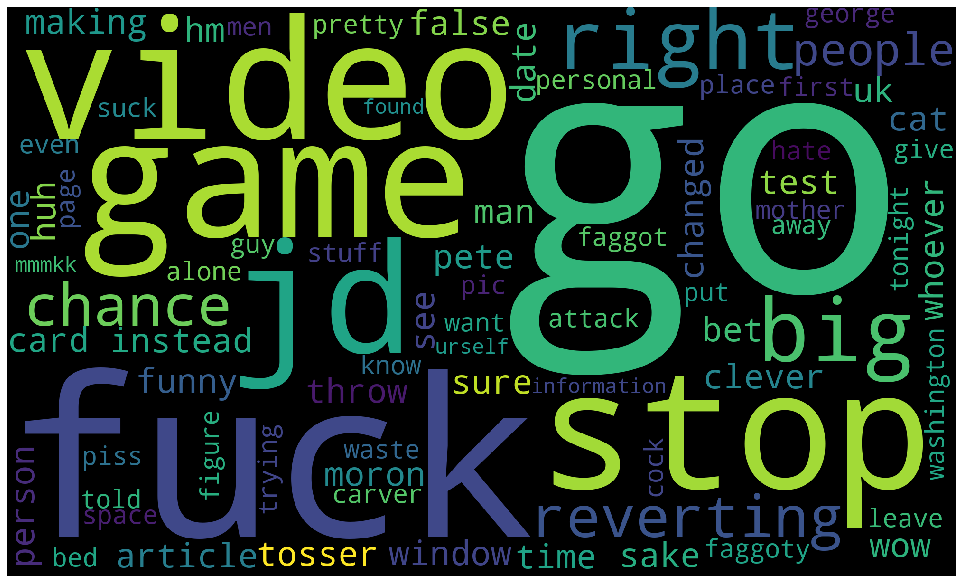

In [51]:
w_toxic = df_toxic[ df_toxic['toxic'] == 1]
w_toxic = w_toxic['comment_text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)   
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2000,
                      height=1200
                     ).generate(cleaned_word)
    
    
    
    plt.figure(1,figsize=(17, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Toxic words")
wordcloud_draw(w_toxic,'black')